# Data Pre-processing 

## Read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(f'Number of Rows and Columns: {df.shape}')

Number of Rows and Columns: (1338, 7)


In [4]:
columns = df. columns
df. columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Check if missing values

In [6]:
for i in columns:
    unique_values = np.unique(df[i])
    print("Unique values in column '{}': {}".format(i, unique_values))

Unique values in column 'age': [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]
Unique values in column 'sex': ['female' 'male']
Unique values in column 'bmi': [15.96  16.815 17.195 17.29  17.385 17.4   17.48  17.67  17.765 17.8
 17.86  17.955 18.05  18.3   18.335 18.5   18.6   18.715 18.905 19.
 19.095 19.19  19.3   19.475 19.57  19.8   19.855 19.95  20.045 20.1
 20.13  20.235 20.3   20.35  20.4   20.425 20.52  20.6   20.615 20.7
 20.79  20.8   20.9   21.01  21.09  21.12  21.28  21.3   21.375 21.4
 21.47  21.5   21.56  21.565 21.66  21.7   21.755 21.78  21.8   21.85
 21.89  21.945 22.    22.04  22.1   22.135 22.22  22.23  22.3   22.42
 22.515 22.6   22.61  22.705 22.77  22.8   22.88  22.895 22.99  23.
 23.085 23.1   23.18  23.2   23.21  23.275 23.3   23.32  23.37  23.4
 23.465 23.54  23.56  23.6   23.65  23.655 23.7   23.75  23.76  23.8
 23.845 23.87  23.9   23.94  23.98  24.035 24.09  24.1 

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Interpretation: 

The data has no missing value, but columns 'bmi' and 'charges' has a high diversity of numerical values, this can result in a more robust and representative representation of the data, but may also make it more complex to analyze or interpret. Therefore, we will create a copy of the datadrame df and name it as newdf for data visualization purpose only.

## Creating newdf for data visualisation only

In [8]:
#for age
bins = [17, 34, 60, 90]
labels = ["young","adult","senior"]
df['age_types'] = pd.cut(df['age'], bins=bins, labels=labels)

#testeing
#df.head()
np.unique(df['age_types'])

array(['adult', 'senior', 'young'], dtype=object)

In [9]:
#for bmi
r=[]

for level in df['bmi']:
    if level < 18.5:
        r.append('underweight')
    elif level >=18.5 and level <=24.9:
        r.append('normal')
    elif level >=25.0 and level <=29.9:
        r.append('overweight')
    else:
        r.append('obesity')
df['bmi_type'] = r

#testeing
#df.head()
np.unique(df['bmi_type'])

array(['normal', 'obesity', 'overweight', 'underweight'], dtype=object)

In [10]:
#for charge
ranges = [0, 3000, 6000, 10000, 20000, float("inf")]
labels = ['low', 'medium-low', 'medium', 'medium-high', 'high']
df['charges_range'] = pd.cut(df['charges'], bins=ranges, labels=labels)

#testeing
df.head()
#np.unique(df['charges_range'])

,age,sex,bmi,children,smoker,region,charges,age_types,bmi_type,charges_range
0,19,female,27.900,0,yes,southwest,16884.92400,young,overweight,medium-high
1,18,male,33.770,1,no,southeast,1725.55230,young,obesity,low
2,28,male,33.000,3,no,southeast,4449.46200,young,obesity,medium-low
3,33,male,22.705,0,no,northwest,21984.47061,young,normal,high
4,32,male,28.880,0,no,northwest,3866.85520,young,overweight,medium-low


In [11]:
df.drop(columns=['charges','age','bmi'],inplace=True)
df.head()

,sex,children,smoker,region,age_types,bmi_type,charges_range
0,female,0,yes,southwest,young,overweight,medium-high
1,male,1,no,southeast,young,obesity,low
2,male,3,no,southeast,young,obesity,medium-low
3,male,0,no,northwest,young,normal,high
4,male,0,no,northwest,young,overweight,medium-low


In [12]:
#create a new dataframe using copy()
newdf = df.copy()
newdf.head()

,sex,children,smoker,region,age_types,bmi_type,charges_range
0,female,0,yes,southwest,young,overweight,medium-high
1,male,1,no,southeast,young,obesity,low
2,male,3,no,southeast,young,obesity,medium-low
3,male,0,no,northwest,young,normal,high
4,male,0,no,northwest,young,overweight,medium-low


In [13]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   sex            1338 non-null   object  
 1   children       1338 non-null   int64   
 2   smoker         1338 non-null   object  
 3   region         1338 non-null   object  
 4   age_types      1338 non-null   category
 5   bmi_type       1338 non-null   object  
 6   charges_range  1338 non-null   category
dtypes: category(2), int64(1), object(4)
memory usage: 55.3+ KB


## Encode the string value of dataframe df for training and prediction

In [14]:
df.head()

,sex,children,smoker,region,age_types,bmi_type,charges_range
0,female,0,yes,southwest,young,overweight,medium-high
1,male,1,no,southeast,young,obesity,low
2,male,3,no,southeast,young,obesity,medium-low
3,male,0,no,northwest,young,normal,high
4,male,0,no,northwest,young,overweight,medium-low


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   sex            1338 non-null   object  
 1   children       1338 non-null   int64   
 2   smoker         1338 non-null   object  
 3   region         1338 non-null   object  
 4   age_types      1338 non-null   category
 5   bmi_type       1338 non-null   object  
 6   charges_range  1338 non-null   int64   
dtypes: category(1), int64(2), object(4)
memory usage: 64.3+ KB


In [15]:
df.loc[df['sex']=='female', 'sex']= 0
df.loc[df['sex']=='male', 'sex'] = 1
df.head()

,sex,children,smoker,region,age_types,bmi_type,charges_range
0,0,0,yes,southwest,young,overweight,medium-high
1,1,1,no,southeast,young,obesity,low
2,1,3,no,southeast,young,obesity,medium-low
3,1,0,no,northwest,young,normal,high
4,1,0,no,northwest,young,overweight,medium-low


In [16]:
df.loc[df['smoker']=='no', 'smoker']= 0
df.loc[df['smoker']=='yes', 'smoker'] = 1
df.head()

,sex,children,smoker,region,age_types,bmi_type,charges_range
0,0,0,1,southwest,young,overweight,medium-high
1,1,1,0,southeast,young,obesity,low
2,1,3,0,southeast,young,obesity,medium-low
3,1,0,0,northwest,young,normal,high
4,1,0,0,northwest,young,overweight,medium-low


In [17]:
df.loc[df['region']=='northeast', 'region']= 0
df.loc[df['region']=='northwest', 'region'] = 1
df.loc[df['region']=='southeast', 'region'] = 2
df.loc[df['region']=='southwest', 'region'] = 3
df.head()

,sex,children,smoker,region,age_types,bmi_type,charges_range
0,0,0,1,3,young,overweight,medium-high
1,1,1,0,2,young,obesity,low
2,1,3,0,2,young,obesity,medium-low
3,1,0,0,1,young,normal,high
4,1,0,0,1,young,overweight,medium-low


In [18]:
#for charges range
c=[]

for level in df['charges_range']:
    if level == 'low':
        c.append(0)
    elif level == 'medium-low':
        c.append(1)
    elif level == 'medium':
        c.append(2)
    elif level == 'medium-high':
        c.append(3)
    else:
        c.append(4)
df['charges_range'] = c

df.head()

,sex,children,smoker,region,age_types,bmi_type,charges_range
0,0,0,1,3,young,overweight,3
1,1,1,0,2,young,obesity,0
2,1,3,0,2,young,obesity,1
3,1,0,0,1,young,normal,4
4,1,0,0,1,young,overweight,1


In [20]:
np.unique(df['age_types'])

array(['adult', 'senior', 'young'], dtype=object)

In [24]:
#for age_types
df['age_types'] = df['age_types'].astype(object)
df.loc[df['age_types']=='young', 'age_types']= 0
df.loc[df['age_types']=='adult', 'age_types'] = 1
df.loc[df['age_types']=='senior', 'age_types'] = 2
df.head()

,sex,children,smoker,region,age_types,bmi_type,charges_range
0,0,0,1,3,0,overweight,3
1,1,1,0,2,0,obesity,0
2,1,3,0,2,0,obesity,1
3,1,0,0,1,0,normal,4
4,1,0,0,1,0,overweight,1


In [25]:
#for bmi
r=[]

for level in df['bmi_type']:
    if level == 'underweight':
        r.append(0)
    elif level == 'normal':
        r.append(1)
    elif level == 'overweight':
        r.append(2)
    else:
        r.append(3)
df['bmi_type'] = r
df.head()

,sex,children,smoker,region,age_types,bmi_type,charges_range
0,0,0,1,3,0,2,3
1,1,1,0,2,0,3,0
2,1,3,0,2,0,3,1
3,1,0,0,1,0,1,4
4,1,0,0,1,0,2,1


#### Interpretation:

Noted that the columns 'bmi','smoker'and 'region' are still object due to we haven't change the data type of these columns.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sex            1338 non-null   object
 1   children       1338 non-null   int64 
 2   smoker         1338 non-null   object
 3   region         1338 non-null   object
 4   age_types      1338 non-null   object
 5   bmi_type       1338 non-null   int64 
 6   charges_range  1338 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 73.3+ KB


In [29]:
#change datatype for future interprediction
df['sex'] = pd.to_numeric(df['sex'])
df['smoker'] = pd.to_numeric(df['smoker'])
df['region'] = pd.to_numeric(df['region'])
df['age_types'] = pd.to_numeric(df['age_types'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   sex            1338 non-null   int64
 1   children       1338 non-null   int64
 2   smoker         1338 non-null   int64
 3   region         1338 non-null   int64
 4   age_types      1338 non-null   int64
 5   bmi_type       1338 non-null   int64
 6   charges_range  1338 non-null   int64
dtypes: int64(7)
memory usage: 73.3 KB


In [30]:
df.head()

,sex,children,smoker,region,age_types,bmi_type,charges_range
0,0,0,1,3,0,2,3
1,1,1,0,2,0,3,0
2,1,3,0,2,0,3,1
3,1,0,0,1,0,1,4
4,1,0,0,1,0,2,1


## Data visualisation

#### Distribution of Target variable

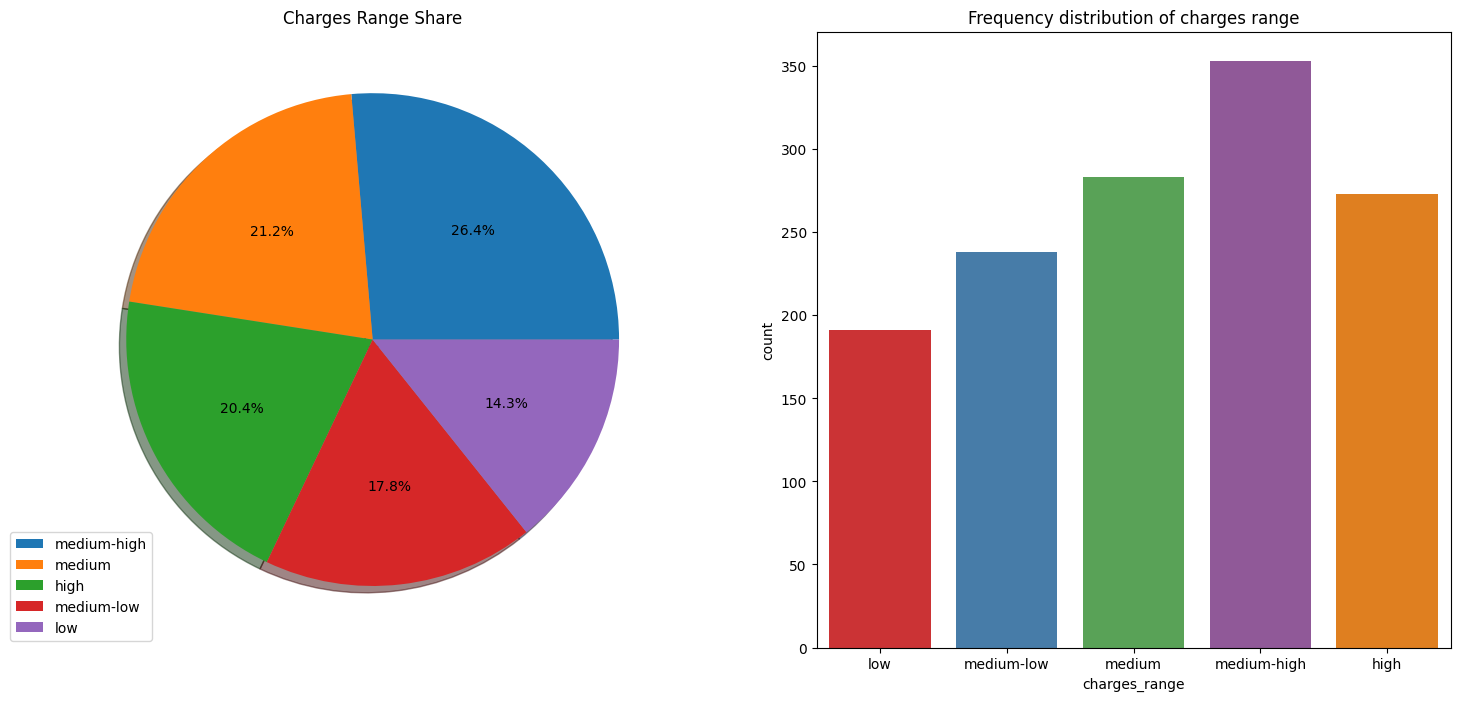

In [31]:
#create two frames
f,ax=plt.subplots(1,2,figsize=(18,8))

#draw the pie chart with matplotlib
explode = [0] * len(newdf['charges_range'].value_counts())
ax[0].pie(newdf['charges_range'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True)
ax[0].set_title('Charges Range Share')

labels = newdf['charges_range'].value_counts().index
ax[0].legend(labels, loc='lower left', bbox_to_anchor=(-0.1,0))

#draw the bar chart with seaborn
ax[1] = sns.countplot(x="charges_range", data=newdf, palette="Set1")
ax[1].set_title("Frequency distribution of charges range")

plt.show()

In [32]:
#count how many and divide the len to get the % of each
newdf['charges_range'].value_counts()/len(newdf)

medium-high    0.263827
medium         0.211510
high           0.204036
medium-low     0.177877
low            0.142750
Name: charges_range, dtype: float64

In [33]:
labels = ['medium-high', 'medium', 'high', 'medium-low', 'low']
for label in labels:
    temp_df = newdf[newdf['charges_range']== label]
    print(f"Shape of {label}: {temp_df.shape}")

Shape of medium-high: (353, 7)
Shape of medium: (283, 7)
Shape of high: (273, 7)
Shape of medium-low: (238, 7)
Shape of low: (191, 7)


#### Interpretation:

We can see that the target variable 'charges_range' is imbalances due to the proportions of different classes are not equal.Since the targer variable is used as part of a machine learning model, the model is overfitting to the majority class, leading to poor performance on the minority class, then it would be considered to have high bias. In this case, we will try to balance this data set later.

#### Distribution of charges_range with the rest of the variables

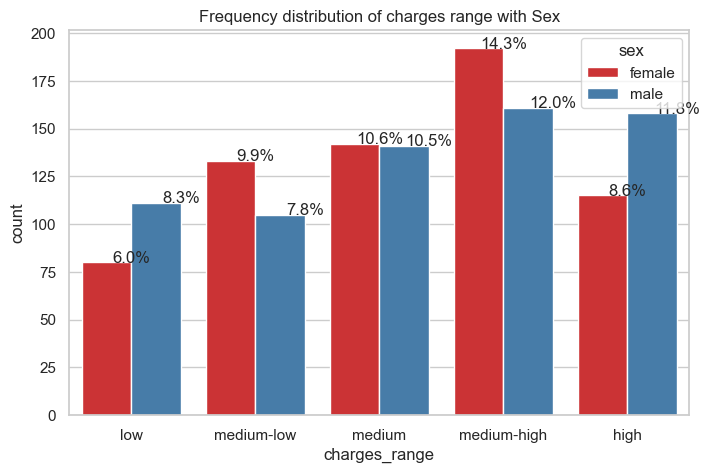

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(newdf))
ax = sns.countplot(x="charges_range", hue="sex", data=newdf,palette='Set1')
ax.set_title("Frequency distribution of charges range with Sex")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()


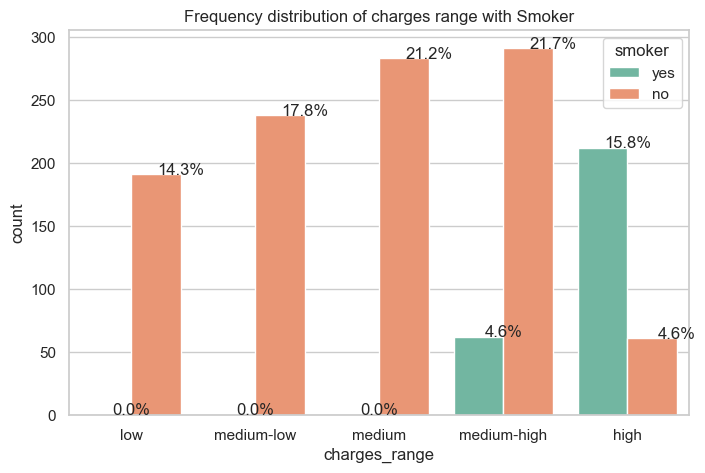

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(newdf))
ax = sns.countplot(x="charges_range", hue="smoker", data=newdf,palette='Set2')
ax.set_title("Frequency distribution of charges range with Smoker")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

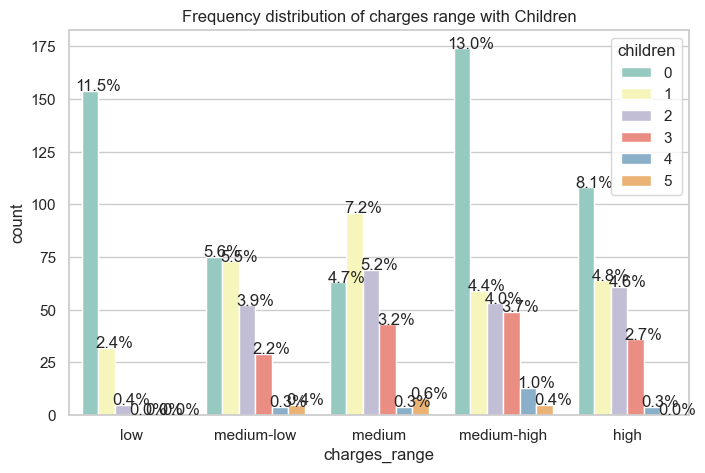

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(newdf))
ax = sns.countplot(x="charges_range", hue="children", data=newdf,palette='Set3')
ax.set_title("Frequency distribution of charges range with Children")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

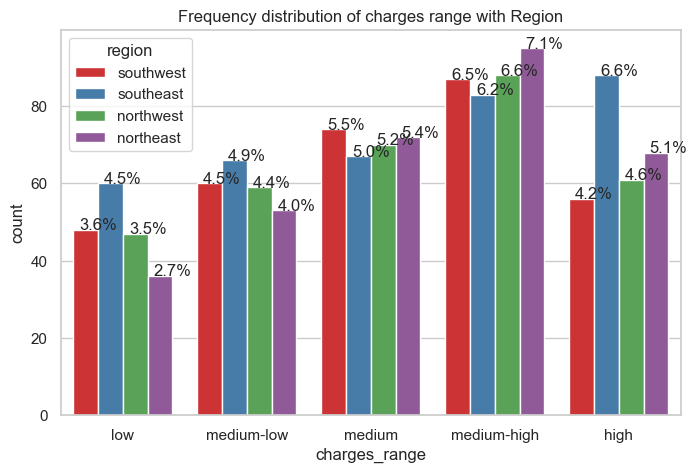

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(newdf))
ax = sns.countplot(x="charges_range", hue="region", data=newdf,palette='Set1')
ax.set_title("Frequency distribution of charges range with Region")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

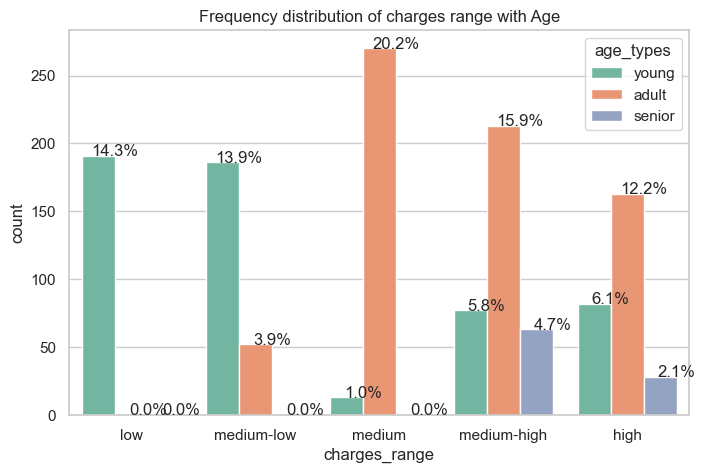

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(newdf))
ax = sns.countplot(x="charges_range", hue="age_types", data=newdf,palette='Set2')
ax.set_title("Frequency distribution of charges range with Age")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

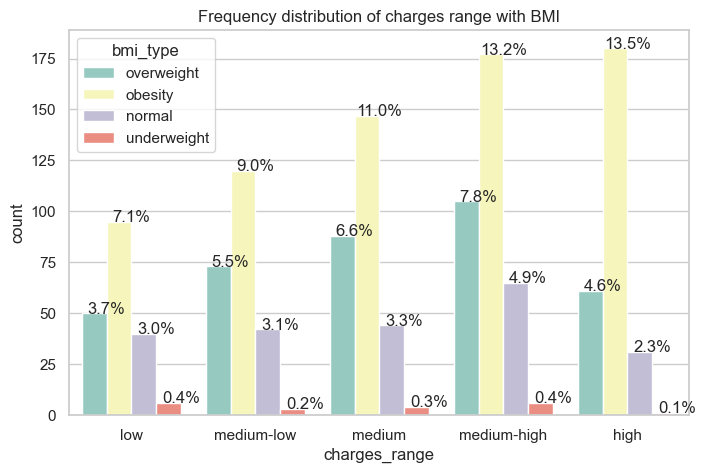

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(newdf))
ax = sns.countplot(x="charges_range", hue="bmi_type", data=newdf,palette='Set3')
ax.set_title("Frequency distribution of charges range with BMI")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

#### Interpretation

There is a positive correlation between being a smoker and having a higher charge range, while non-smokers are more likely to have a medium to medium-high charge range. Moreover, due the correlation between being senir age or bmi obesity with the target variable, the medical charges tend to be higher for older/obese individuals compared to younger/skinnier ones.While gender/region has weak correlation with targe variable. In terms of the distribution chart of charges range with number of children, it requiere more information to draw more conclusions since the chart does not seem normal.

## Finding Categorical Values and Numerical Values

### Numerical Columns

In [40]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='int64' or df[var_1].dtype=='float64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 7 numerical variables

The numerical variables are :

 ['sex', 'children', 'smoker', 'region', 'age_types', 'bmi_type', 'charges_range']


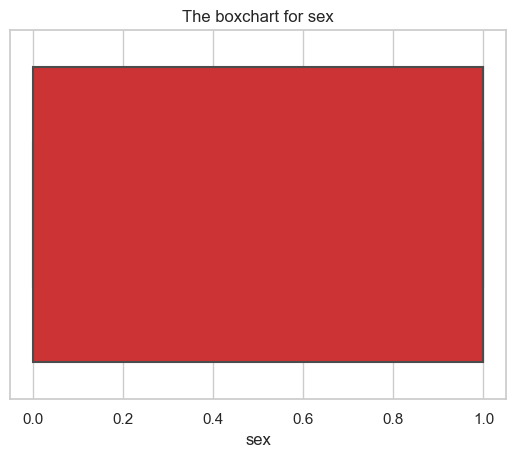

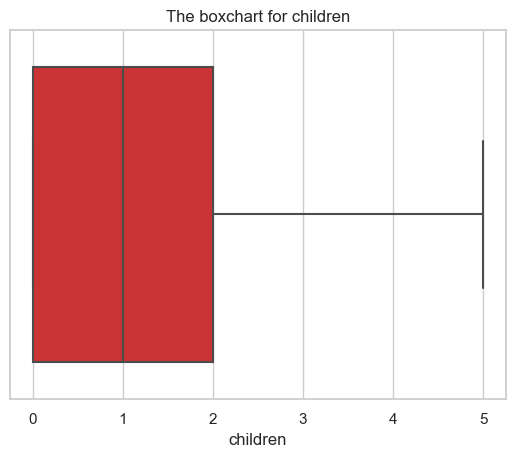

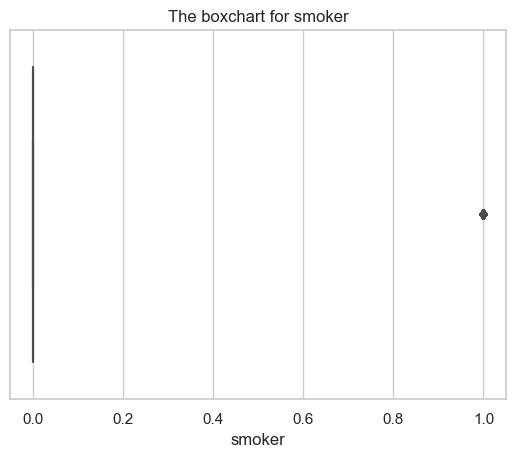

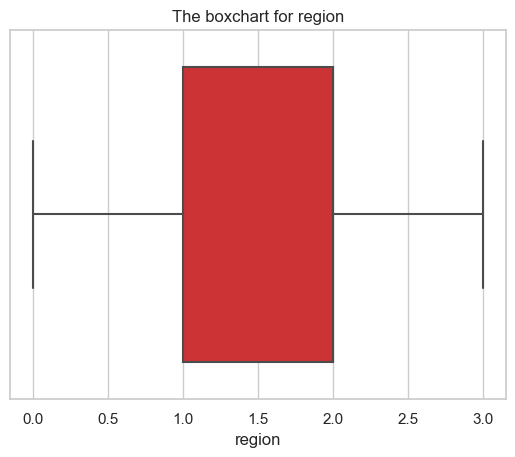

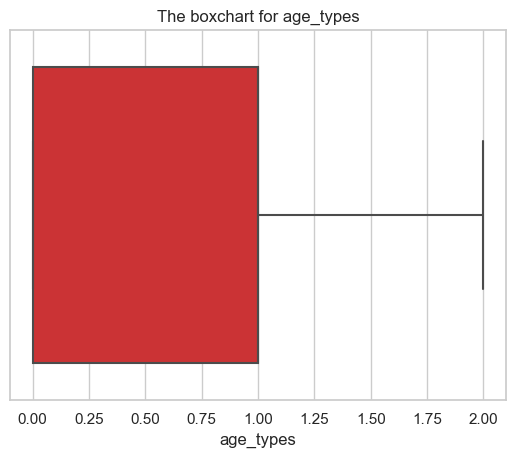

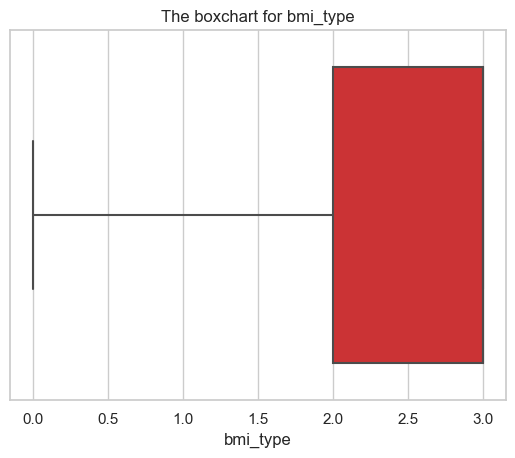

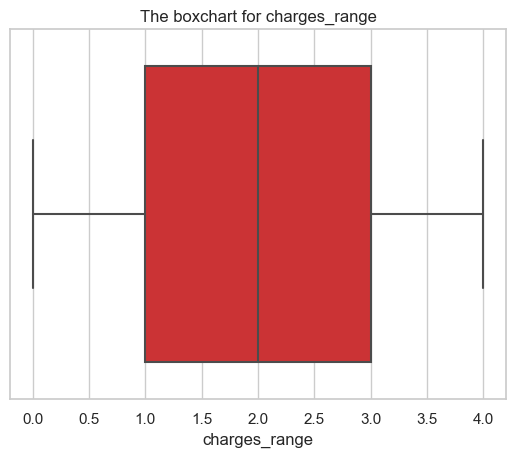

In [41]:
#Let's check for outliers in the numerical columns
for i in numerical:
    sns.boxplot(x = df[i][1:],data=df.iloc[1:], whis=100000, order=df[i][1:].value_counts().index, palette='Set1')
    plt.title("The boxchart for {}".format(i))
    plt.show()

#### Interpretation:

There is no outliner in numerical columns that can impact on the results of statistical analysis and modeling.

/var/folders/pg/s8h1mcjj25q1n0v3sy74_tlw0000gn/T/ipykernel_67337/1812300638.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set2',bins=20)


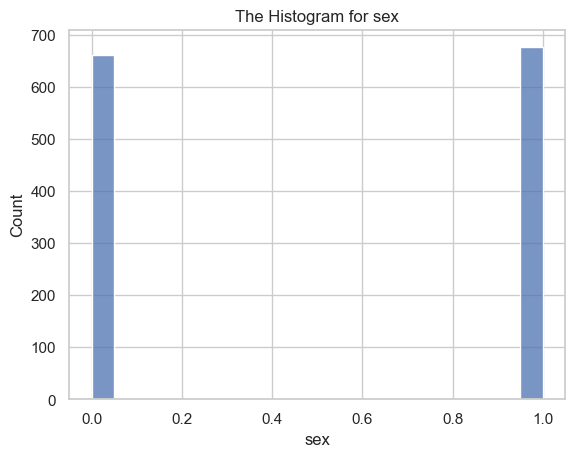

/var/folders/pg/s8h1mcjj25q1n0v3sy74_tlw0000gn/T/ipykernel_67337/1812300638.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set2',bins=20)


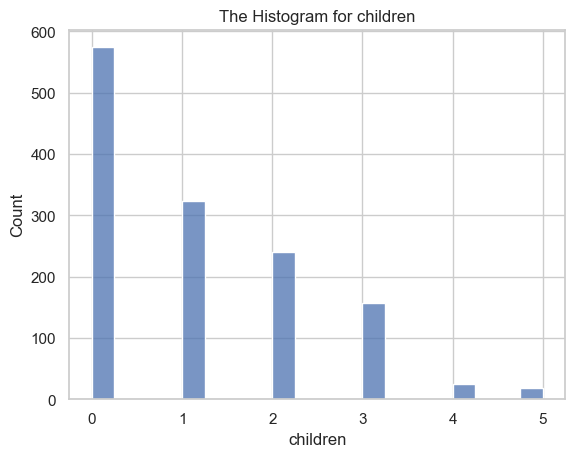

/var/folders/pg/s8h1mcjj25q1n0v3sy74_tlw0000gn/T/ipykernel_67337/1812300638.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set2',bins=20)


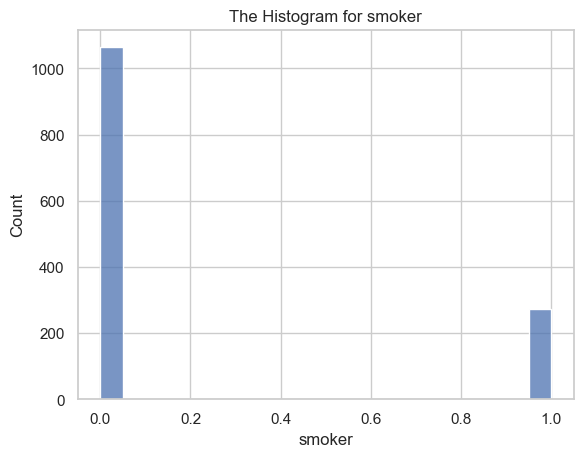

/var/folders/pg/s8h1mcjj25q1n0v3sy74_tlw0000gn/T/ipykernel_67337/1812300638.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set2',bins=20)


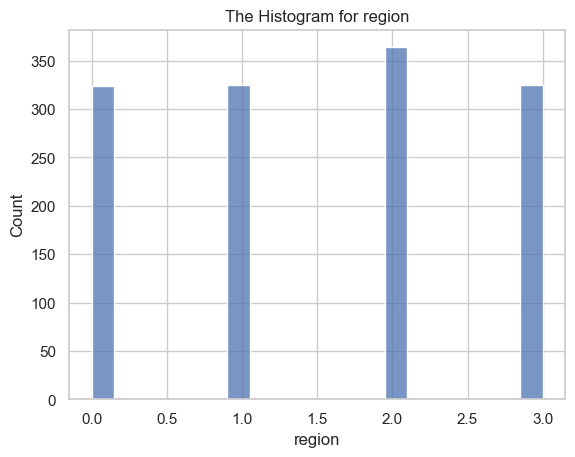

/var/folders/pg/s8h1mcjj25q1n0v3sy74_tlw0000gn/T/ipykernel_67337/1812300638.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set2',bins=20)


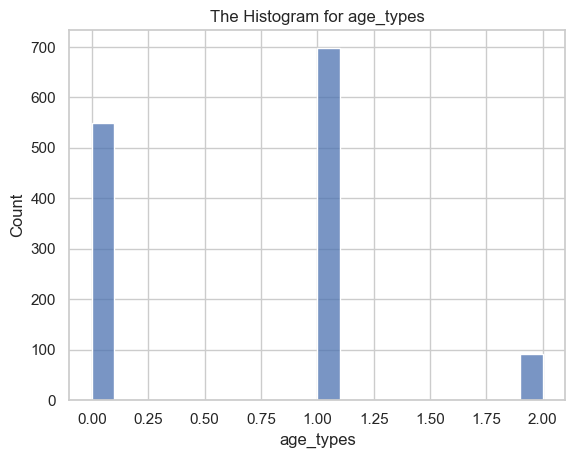

/var/folders/pg/s8h1mcjj25q1n0v3sy74_tlw0000gn/T/ipykernel_67337/1812300638.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set2',bins=20)


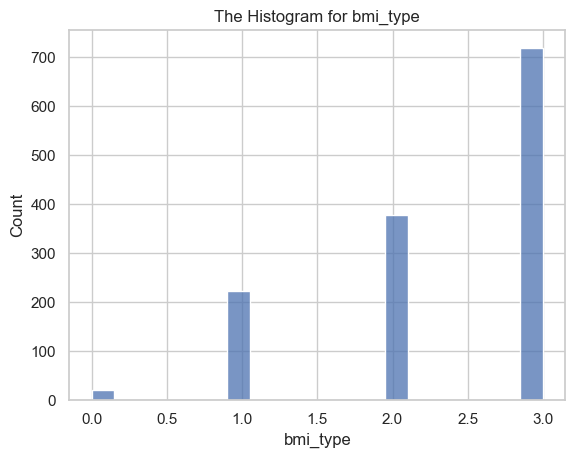

/var/folders/pg/s8h1mcjj25q1n0v3sy74_tlw0000gn/T/ipykernel_67337/1812300638.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set2',bins=20)


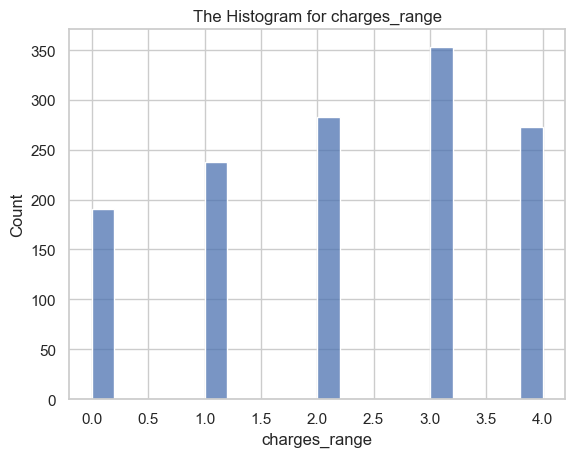

In [42]:
for i in numerical:
    sns.histplot(x=df[i], palette='Set2',bins=20)
    plt.title("The Histogram for {}".format(i))
    plt.show()

#### Interpretation:

The graph is rightly skewed in terms of age, children and smoker.Therefore we need to normalize it by scaling.

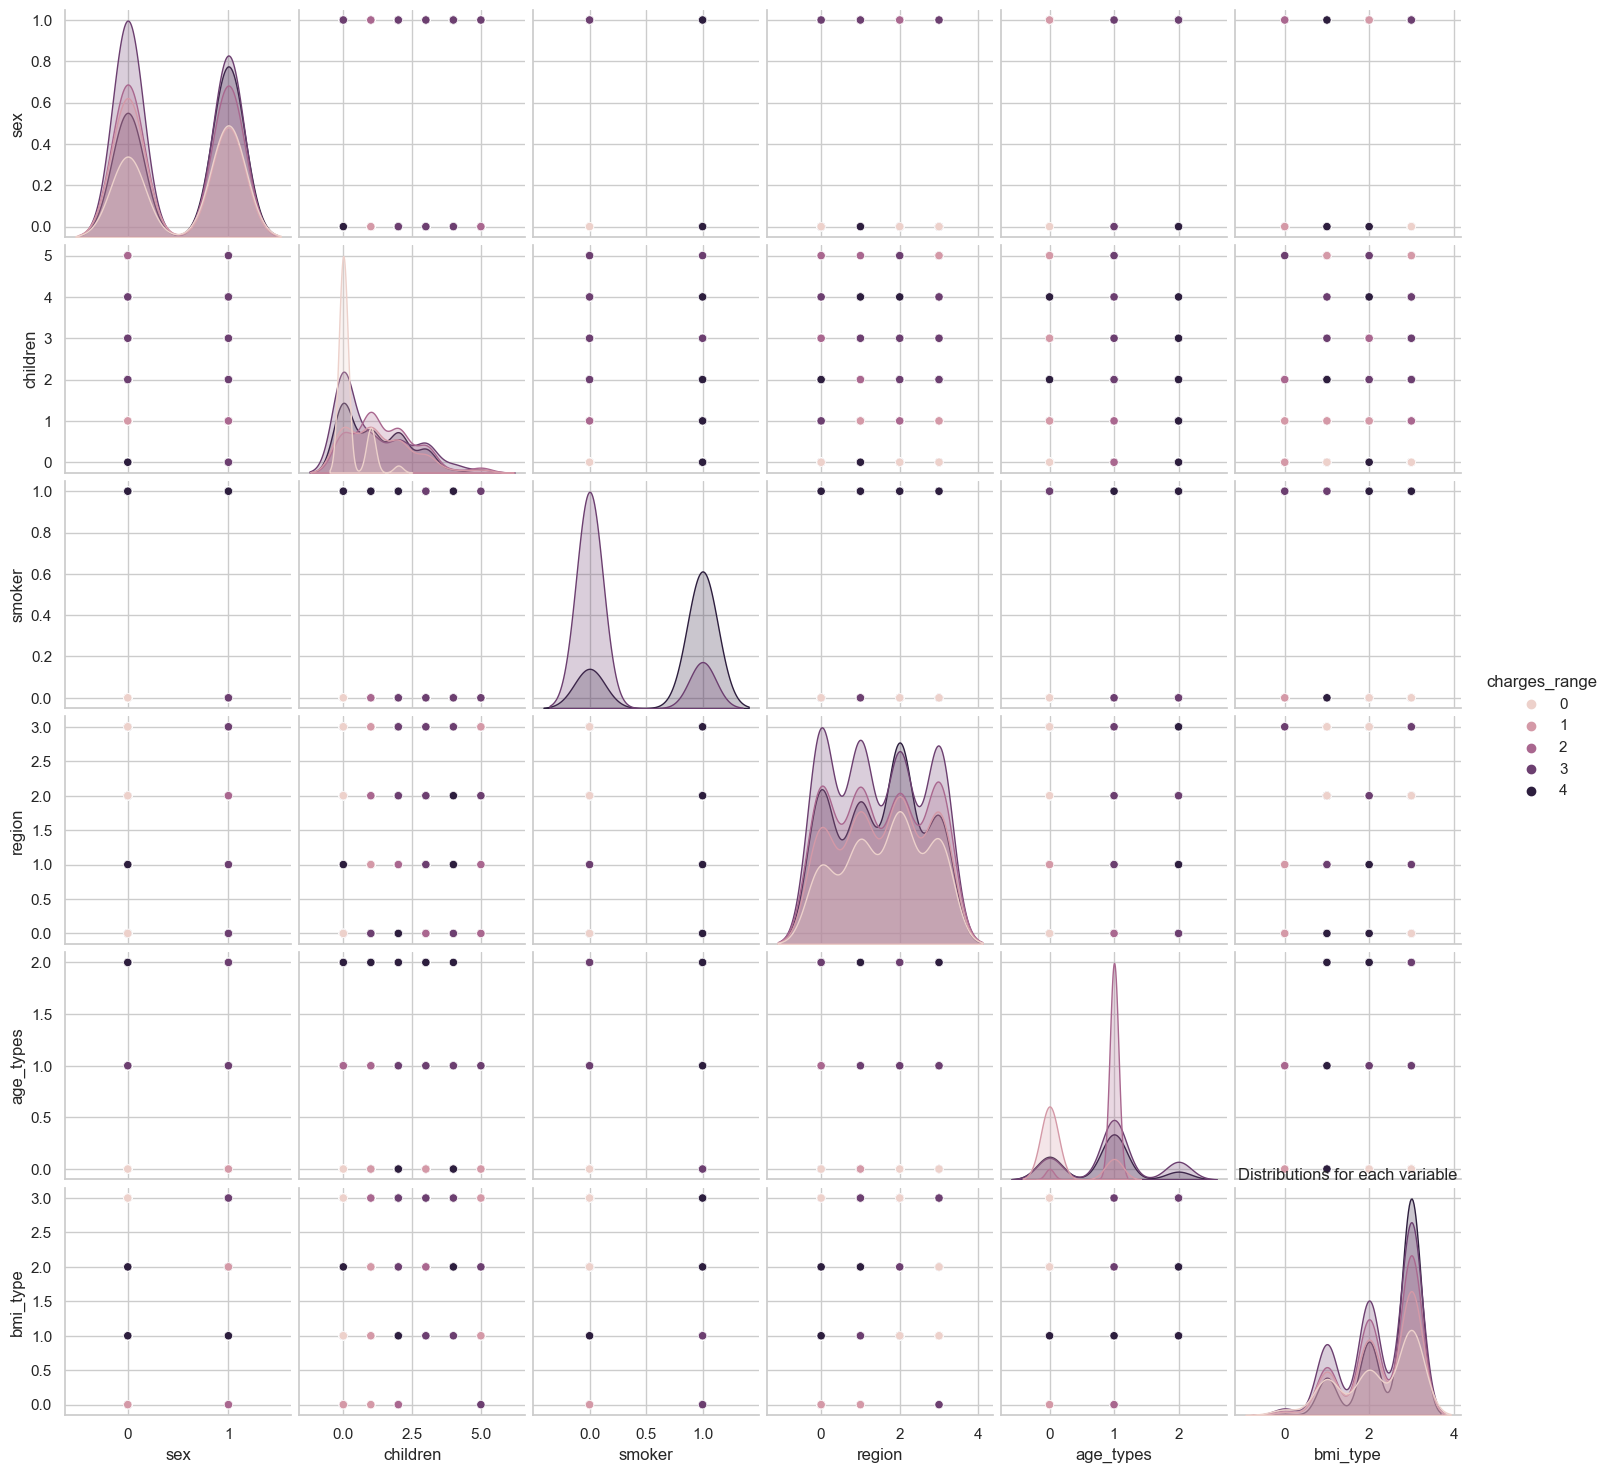

In [43]:
sns.pairplot(data=df, hue="charges_range")
plt.title('Distributions for each variable')
plt.show()

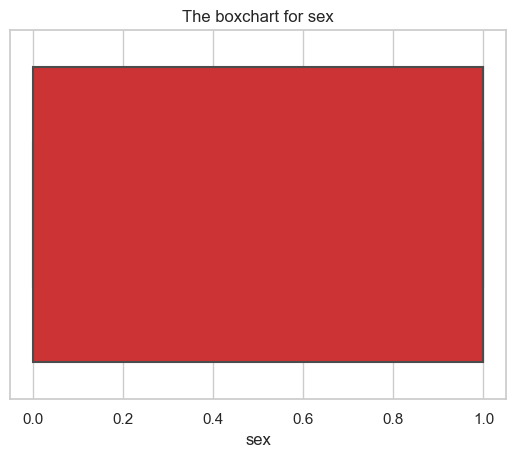

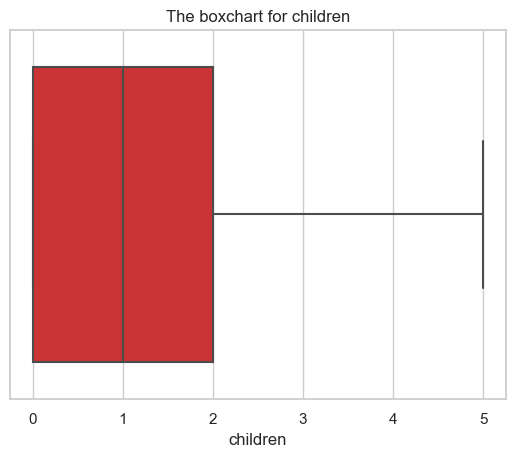

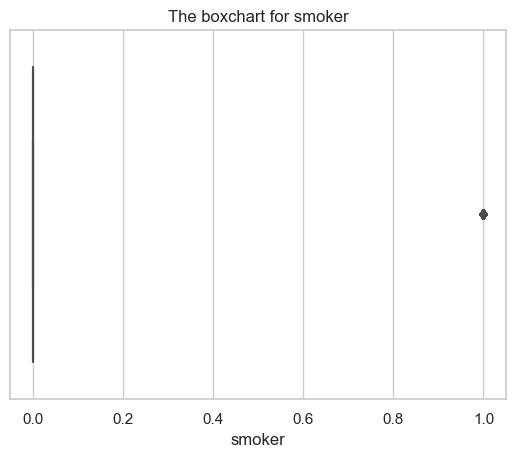

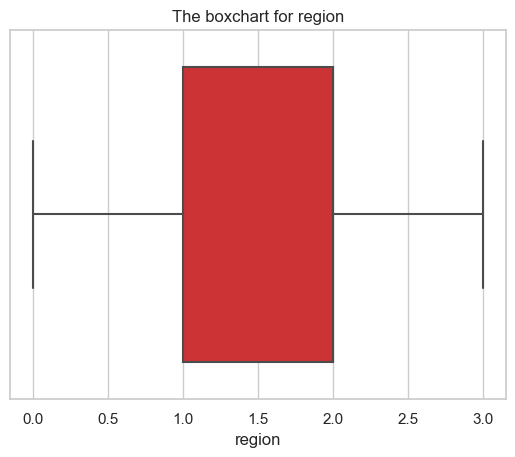

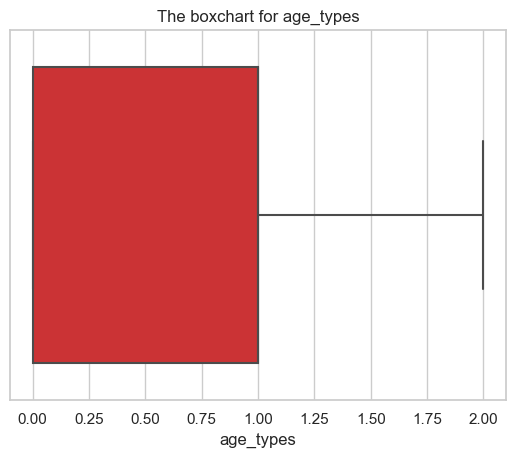

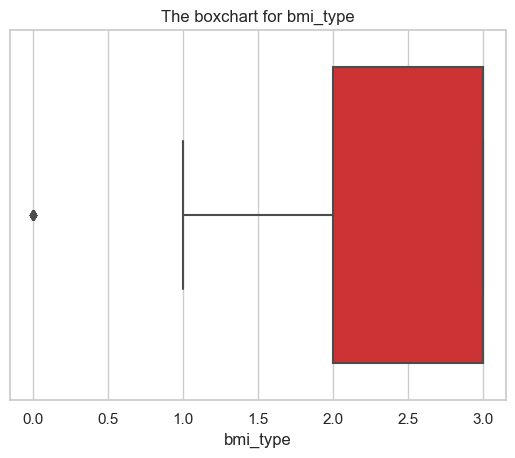

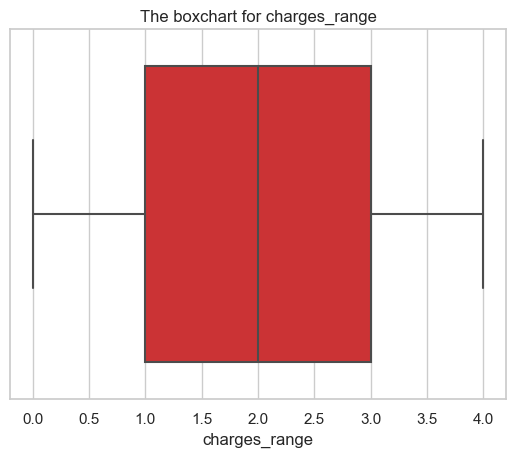

In [44]:
#Let's check for outliers in the numerical columns
for i in numerical:
    sns.boxplot(x = df[i][1:],data=df.iloc[1:], order=df[i][1:].value_counts().index, palette='Set1')
    plt.title("The boxchart for {}".format(i))
    plt.show()

### Categorical columns

In [54]:
categorical = [var for var in newdf.columns if newdf[var].dtype=='O' or 'category']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 7 categorical variables

The categorical variables are :

 ['sex', 'children', 'smoker', 'region', 'age_types', 'bmi_type', 'charges_range']


In [55]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   sex            1338 non-null   object  
 1   children       1338 non-null   int64   
 2   smoker         1338 non-null   object  
 3   region         1338 non-null   object  
 4   age_types      1338 non-null   category
 5   bmi_type       1338 non-null   object  
 6   charges_range  1338 non-null   category
dtypes: category(2), int64(1), object(4)
memory usage: 55.3+ KB


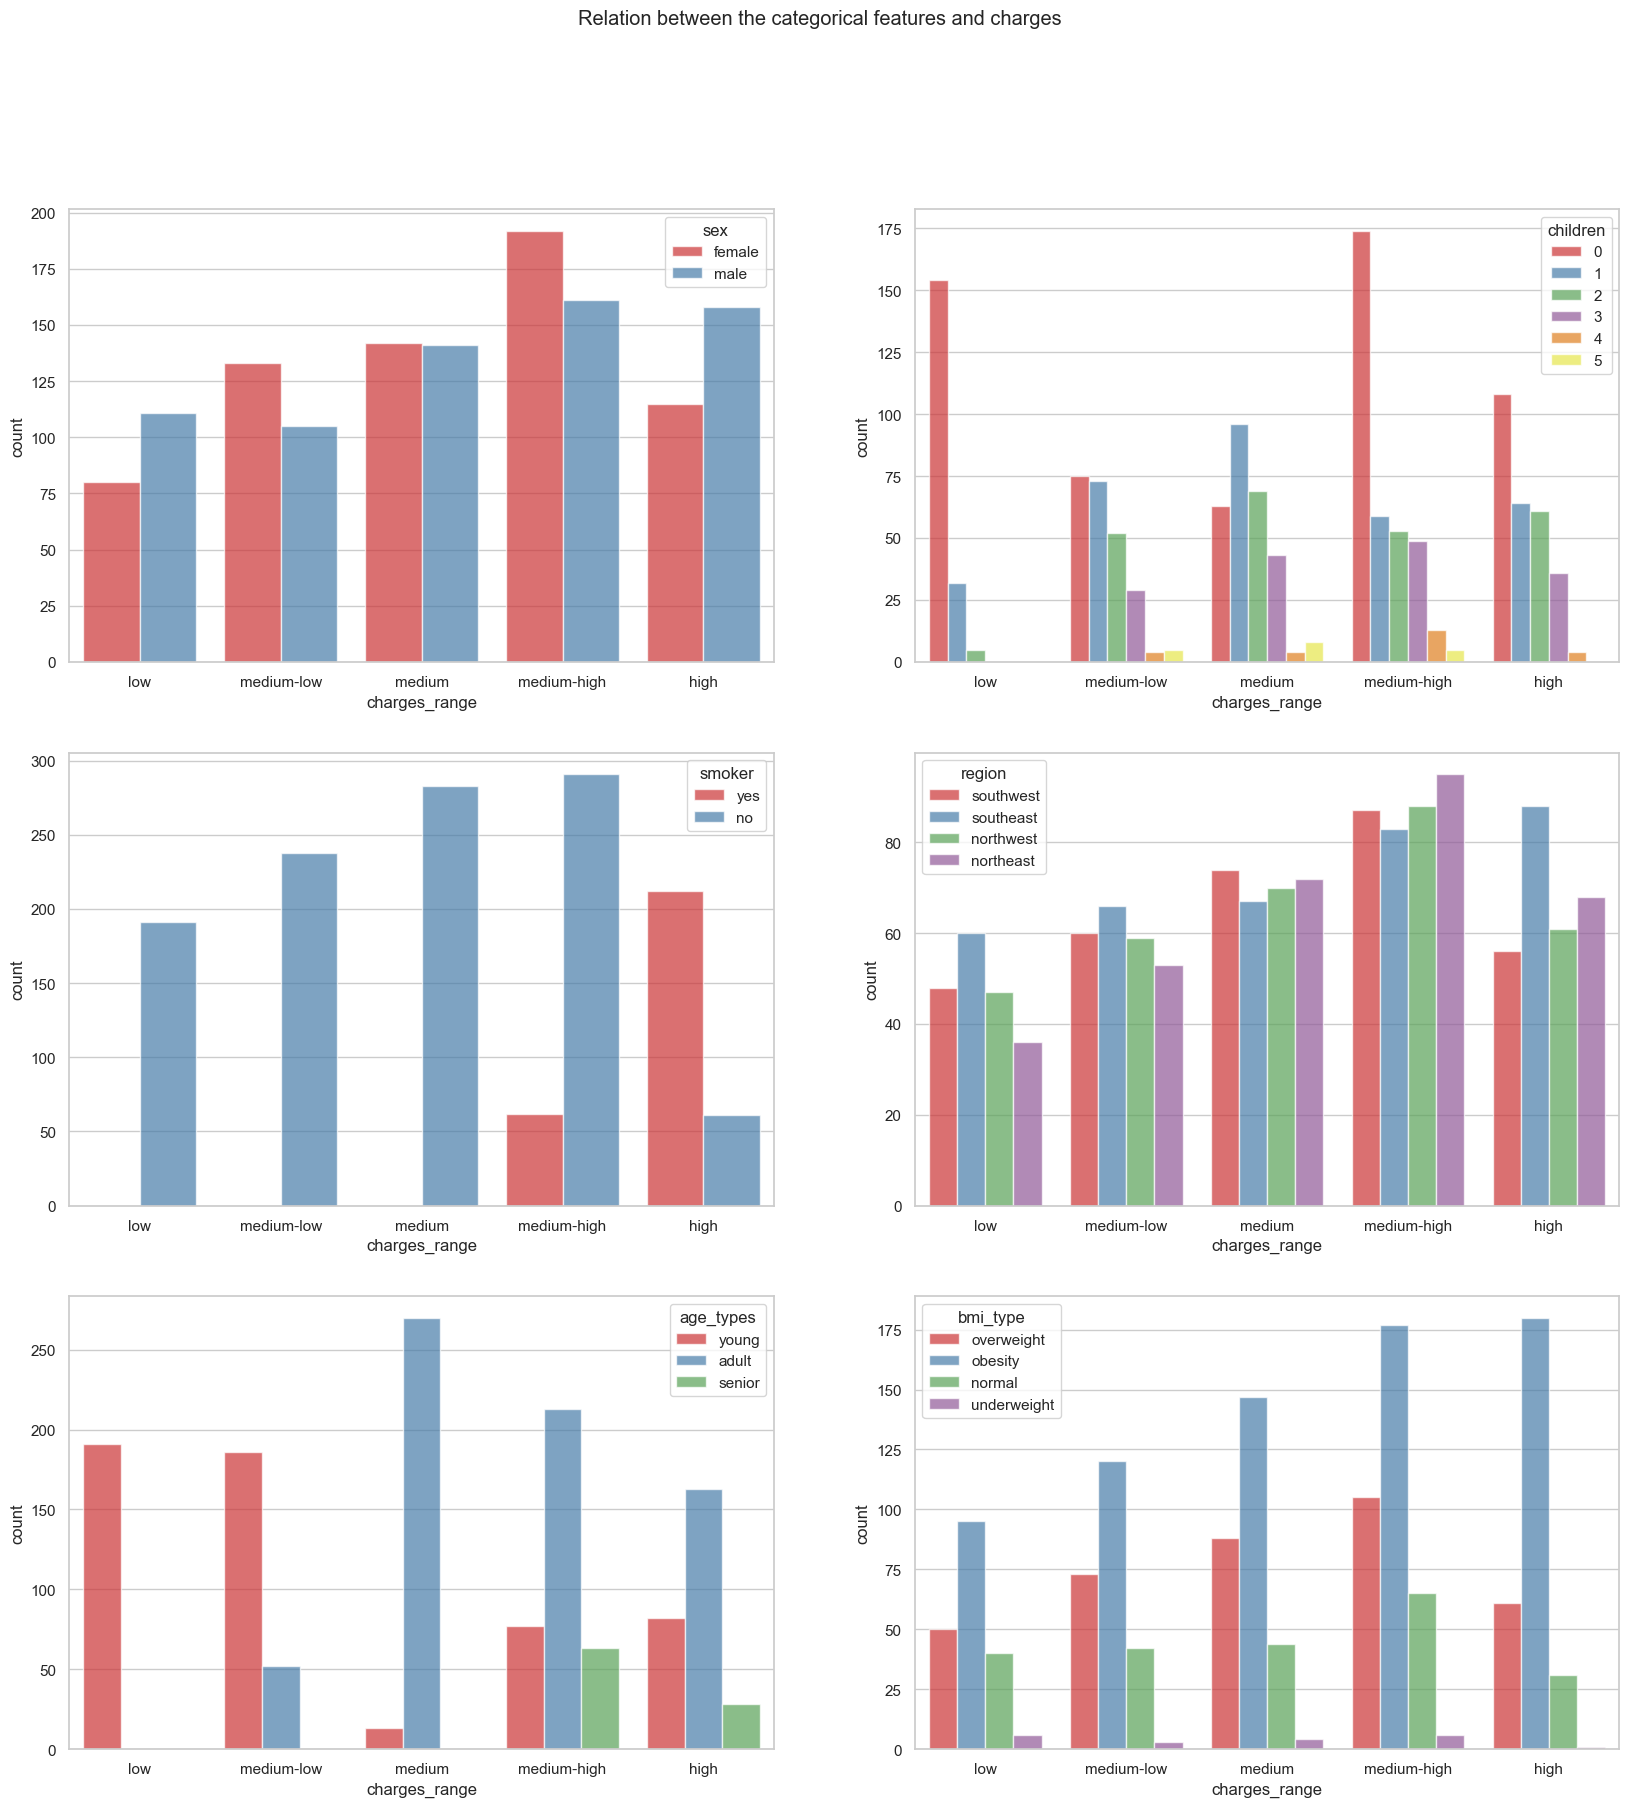

In [57]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
axs = axs.flatten()
fig.suptitle('Relation between the categorical features and charges')

categorical2 = ['sex', 'children', 'smoker', 'region', 'age_types', 'bmi_type']
for ax, i in enumerate(categorical2):
    sns.countplot(x='charges_range', alpha=0.7, hue=i, data=newdf, ax=axs[ax],palette='Set1')

## Find Correlation

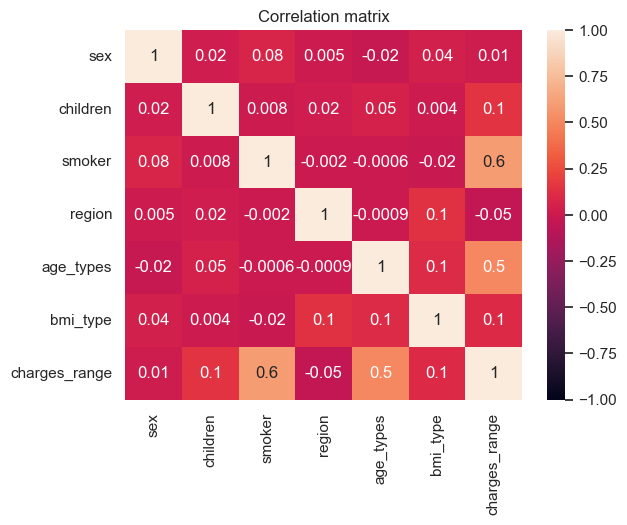

In [58]:
corr = df.corr()
#matrix = np.triu(corr)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)

plt.title('Correlation matrix')
plt.show()

Interpretation:

Smoker has the highest correlation with the charges_range, secondly the age.

## Normalizing the variables

In [59]:
df.head()

,sex,children,smoker,region,age_types,bmi_type,charges_range
0,0,0,1,3,0,2,3
1,1,1,0,2,0,3,0
2,1,3,0,2,0,3,1
3,1,0,0,1,0,1,4
4,1,0,0,1,0,2,1


In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# scaled_features = scaler.fit(df.drop(['sex','region','bmi_type','charges_range'],axis=1))
scaler.fit(df.drop(['charges_range'],axis=1))
scaled_features = scaler.transform(df.drop(['charges_range'],axis=1))

In [71]:
df.columns

Index(['sex', 'children', 'smoker', 'region', 'age_types', 'bmi_type',
       'charges_range'],
      dtype='object')

In [72]:
columns = ['sex', 'children', 'smoker', 'region', 'age_types', 'bmi_type',]

In [73]:
df_scaled = pd.DataFrame(scaled_features,columns=columns)
df_scaled.head()

,sex,children,smoker,region,age_types,bmi_type
0,0.0,0.0,1.0,1.000000,0.0,0.666667
1,1.0,0.2,0.0,0.666667,0.0,1.000000
2,1.0,0.6,0.0,0.666667,0.0,1.000000
3,1.0,0.0,0.0,0.333333,0.0,0.333333
4,1.0,0.0,0.0,0.333333,0.0,0.666667


## Handling Imbalanced dataset

Using over sampling method to handle imbalanced dataset

In [74]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

X = df_scaled
y= df.charges_range

In [75]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

X_res.shape,y_res.shape

((1743, 6), (1743,))

In [76]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({3: 353, 2: 283, 4: 273, 1: 238, 0: 191})
Resampled dataset shape Counter({3: 350, 0: 349, 4: 349, 2: 349, 1: 346})


## Train_test_split

In [77]:
from sklearn.model_selection import train_test_split

#split data with shuffle (20% test 80% train)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=101,shuffle=True)
#shuffles the data before splitting it into training and testing sets.

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (1394, 6)
X_test shape: (349, 6)
y_train shape: (1394,)
y_test shape: (349,)


In [78]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

## Building Model

### 1. SVC

In [80]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC(random_state = 101)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.6721538897913927
Test Score: 0.7421203438395415


In [81]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(X_test,y_test)

### 2. Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
classifier = BernoulliNB()
accuracies = cross_val_score(classifier, X_train, y_train, cv=5)
classifier.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",classifier.score(X_test,y_test))

Train Score: 0.6635362677599855
Test Score: 0.664756446991404


In [83]:
result_dict_train["Naive Bayes Default Train Score"] = np.mean(accuracies)
result_dict_test["Naive Bayes Default Test Score"] = classifier.score(X_test,y_test)

### 3.Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=5000)
accuracies = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_model.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",lr_model.score(X_test,y_test))

Train Score: 0.6427425801294449
Test Score: 0.667621776504298


In [85]:
result_dict_train["Logistic regression Default Train Score"] = np.mean(accuracies)
result_dict_test["Logistic regression Default Test Score"] = lr_model.score(X_test,y_test)

### Comparing result

In [86]:
print(result_dict_train)

{'SVM Default Train Score': 0.6721538897913927, 'Naive Bayes Default Train Score': 0.6635362677599855, 'Logistic regression Default Train Score': 0.6427425801294449}


In [87]:
print(result_dict_test)

{'SVM Default Test Score': 0.7421203438395415, 'Naive Bayes Default Test Score': 0.664756446991404, 'Logistic regression Default Test Score': 0.667621776504298}


# Conclusion

The attributes most correlated with the medical insurance cost is:
Top 1. Smoker
Top 2. Age
Top 3. Bmi

The least correlated is:
Top 1. Region
Top 2. Number of children
Top 3. Sex

The dataset is biased toward young people.
Insurance cost mean is much higher than the median, which indicates that majority people pay below average cost.